<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Braisleirao_Pontas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[01/03/25 15:52:54] INFO     No custom team name replacements found. You can configure these in       ]8;id=672686;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=503794;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=146718;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=494003;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[01/03/25 15:52:56] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=503405;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=998592;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                   Playing Time               \
                                                             MP Starts   Min   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio           20     14  1215   
                                  Alex Santana                4      0   101   
                                  Bento                       7      7   630   
                                  Bruno Praxedes              7      2   237   
                                  Bruno Zapelli              32     16  1412   

                                                         Performance      ...  \
                                                     90s         Gls Ast  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           4   1  ...   
                                  Alex Santana       1.1           0   0  ...   
                                  Bento              7.0           0   0  ...   
                                  Bruno Praxedes     2.6           0   0  ...   
                                  Bruno Zapelli     15.7           0   5  ...   

                                                   Per 90 Minutes              \
                                                              Gls   Ast   G+A   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            0.3  0.07  0.37   
                                  Alex Santana                0.0   0.0   0.0   
                                  Bento                       0.0   0.0   0.0   
                                  Bruno Praxedes              0.0   0.0   0.0   
                                  Bruno Zapelli               0.0  0.32  0.32   

                                                                            \
                                                   G-PK G+A-PK    xG   xAG   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.3   0.37  0.26  0.18   
                                  Alex Santana      0.0    0.0  0.06   0.0   
                                  Bento             0.0    0.0   0.0   0.0   
                                  Bruno Praxedes    0.0    0.0  0.03  0.12   
                                  Bruno Zapelli     0.0   0.32  0.24   0.3   

                                                                          
                                                   xG+xAG  npxG npxG+xAG  
league      season team           player                                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   0.44  0.26     0.44  
                                  Alex Santana       0.06  0.06     0.06  
                                  Bento               0.0   0.0      0.0  
                                  Bruno Praxedes     0.15  0.03     0.15  
                                  Bruno Zapelli      0.54  0.24     0.54  

[5 rows x 33 columns]

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born Playing Time         ... Per 90 Minutes                                \
                  MP Starts  ...            Gls   Ast   G+A G-PK G+A-PK    xG   
0  1998           20     14  ...            0.3  0.07  0.37  0.3   0.37  0.26   
1  1995            4      0  ...            0.0   0.0   0.0  0.0    0.0  0.06   
2  1999            7      7  ...            0.0   0.0   0.0  0.0    0.0   0.0   
3  2002            7      2  ...            0.0   0.0   0.0  0.0    0.0  0.03   
4  2002           32     16  ...            0.0  0.32  0.32  0.0   0.32  0.24   

                               
    xAG xG+xAG  npxG npxG+xAG  
0  0.18   0.44  0.26     0.44  
1   0.0   0.06  0.06     0.06  
2   0.0    0.0   0.0      0.0  
3  0.12   0.15  0.03     0.15  
4   0.3   0.54  0.24     0.54  

[5 rows x 37 columns]

In [8]:
player_season_pas = fbref.read_player_season_stats(stat_type="passing")
player_season_pas.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Total             \
                                                           Cmp  Att  Cmp%   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5   329  430  76.5   
                                  Alex Santana       1.1    45   50  90.0   
                                  Bento              7.0   121  171  70.8   
                                  Bruno Praxedes     2.6    70  100  70.0   
                                  Bruno Zapelli     15.7   536  738  72.6   

                                                                    ...  Long  \
                                                   TotDist PrgDist  ...  Cmp%   
league      season team           player                            ...         
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    4801    1316  ...  45.5   
                                  Alex Santana         619     131  ...   0.0   
                                  Bento               4251    3329  ...  56.4   
                                  Bruno Praxedes      1177     365  ...  66.7   
                                  Bruno Zapelli       8593    2366  ...  47.8   

                                                   Ast  xAG Expected        \
                                                                  xA A-xAG   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   1  2.5      1.7  -1.5   
                                  Alex Santana       0  0.0      0.1   0.0   
                                  Bento              0  0.0      0.0   0.0   
                                  Bruno Praxedes     0  0.3      0.4  -0.3   
                                  Bruno Zapelli      5  4.7      4.6   0.3   

                                                    KP 1/3 PPA CrsPA PrgP  
                                                                           
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  23  30  24     5   57  
                                  Alex Santana       0   2   0     0    2  
                                  Bento              0   4   0     0    0  
                                  Bruno Praxedes     4  11   1     0   12  
                                  Bruno Zapelli     47  49  30     7   82  

[5 rows x 28 columns]

In [9]:
player_season_pas = player_season_pas.reset_index()
print(player_season_pas.columns)
player_season_pas.head()

MultiIndex([(  'league',        ''),
            (  'season',        ''),
            (    'team',        ''),
            (  'player',        ''),
            (  'nation',        ''),
            (     'pos',        ''),
            (     'age',        ''),
            (    'born',        ''),
            (     '90s',        ''),
            (   'Total',     'Cmp'),
            (   'Total',     'Att'),
            (   'Total',    'Cmp%'),
            (   'Total', 'TotDist'),
            (   'Total', 'PrgDist'),
            (   'Short',     'Cmp'),
            (   'Short',     'Att'),
            (   'Short',    'Cmp%'),
            (  'Medium',     'Cmp'),
            (  'Medium',     'Att'),
            (  'Medium',    'Cmp%'),
            (    'Long',     'Cmp'),
            (    'Long',     'Att'),
            (    'Long',    'Cmp%'),
            (     'Ast',        ''),
            (     'xAG',        ''),
            ('Expected',      'xA'),
            ('Expected',   'A-xAG'),
 

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Total  ...  Long Ast  xAG Expected        KP 1/3 PPA CrsPA PrgP  
                Cmp  ...  Cmp%                xA A-xAG                         
0  1998  13.5   329  ...  45.5   1  2.5      1.7  -1.5  23  30  24     5   57  
1  1995   1.1    45  ...   0.0   0  0.0      0.1   0.0   0   2   0     0    2  
2  1999   7.0   121  ...  56.4   0  0.0      0.0   0.0   0   4   0     0    0  
3  2002   2.6    70  ...  66.7   0  0.3      0.4  -0.3   4  11   1     0   12  
4  2002  15.7   536  ...  47.8   5  4.7      4.6   0.3  47  49  30     7   82  

[5 rows x 32 columns]

In [10]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Performance       \
                                                                CrdY CrdR   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           6    1   
                                  Alex Santana       1.1           2    0   
                                  Bento              7.0           1    0   
                                  Bruno Praxedes     2.6           0    0   
                                  Bruno Zapelli     15.7           3    0   

                                                                  ...          \
                                                   2CrdY Fls Fld  ... Crs Int   
league      season team           player                          ...           
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     1  17  25  ...  36   4   
                                  Alex Santana         0   3   1  ...   0   0   
                                  Bento                0   1   0  ...   0   0   
                                  Bruno Praxedes       0   8   2  ...   7   2   
                                  Bruno Zapelli        0  19  18  ...  93   8   

                                                                              \
                                                   TklW PKwon PKcon OG Recov   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   19     0     0  0    71   
                                  Alex Santana        0     0     0  0     6   
                                  Bento               0     0     1  0     4   
                                  Bruno Praxedes      4     0     0  0    13   
                                  Bruno Zapelli      19     0     0  0    70   

                                                   Aerial Duels              
                                                            Won Lost   Won%  
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            7    7   50.0  
                                  Alex Santana                2    4   33.3  
                                  Bento                       2    0  100.0  
                                  Bruno Praxedes              3    2   60.0  
                                  Bruno Zapelli               4   17   19.0  

[5 rows x 21 columns]

In [11]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Performance  ...                                   Aerial Duels  \
                     CrdY  ... Crs Int TklW PKwon PKcon OG Recov          Won   
0  1998  13.5           6  ...  36   4   19     0     0  0    71            7   
1  1995   1.1           2  ...   0   0    0     0     0  0     6            2   
2  1999   7.0           1  ...   0   0    0     0     1  0     4            2   
3  2002   2.6           0  ...   7   2    4     0     0  0    13            3   
4  2002  15.7           3  ...  93   8   19     0     0  0    70            4   

               
  Lost   Won%  
0    7   50.0  
1    4   33.3  
2    0  100.0  
3    2   60.0  
4   17   19.0  

[5 rows x 25 columns]

In [12]:
player_season_pos = fbref.read_player_season_stats(stat_type="possession")
player_season_pos.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Touches          \
                                                         Touches Def Pen   
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5     617       4   
                                  Alex Santana       1.1      59       0   
                                  Bento              7.0     184     156   
                                  Bruno Praxedes     2.6     130       4   
                                  Bruno Zapelli     15.7     926      11   

                                                                            \
                                                   Def 3rd Mid 3rd Att 3rd   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio      57     245     326   
                                  Alex Santana           4      31      24   
                                  Bento                183       1       0   
                                  Bruno Praxedes        24      57      52   
                                  Bruno Zapelli         90     411     440   

                                                    ... Carries          \
                                                    ... Carries TotDist   
league      season team           player            ...                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  ...     408    2537   
                                  Alex Santana      ...      35     205   
                                  Bento             ...      97     508   
                                  Bruno Praxedes    ...      58     436   
                                  Bruno Zapelli     ...     539    2717   

                                                                             \
                                                   PrgDist PrgC 1/3 CPA Mis   
league      season team           player                                      
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    1183   47  34   9  39   
                                  Alex Santana          98    1   4   1   0   
                                  Bento                285    0   0   0   0   
                                  Bruno Praxedes       204    5   3   0   1   
                                  Bruno Zapelli       1187   37  24   8  33   

                                                       Receiving       
                                                   Dis       Rec PrgR  
league      season team           player                               
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  29       423  136  
                                  Alex Santana       0        39    1  
                                  Bento              0        76    0  
                                  Bruno Praxedes     2        75   13  
                                  Bruno Zapelli     36       644  116  

[5 rows x 27 columns]

In [13]:
player_season_pos = player_season_pos.reset_index()
print(player_season_pos.columns)
player_season_pos.head()

MultiIndex([(   'league',        ''),
            (   'season',        ''),
            (     'team',        ''),
            (   'player',        ''),
            (   'nation',        ''),
            (      'pos',        ''),
            (      'age',        ''),
            (     'born',        ''),
            (      '90s',        ''),
            (  'Touches', 'Touches'),
            (  'Touches', 'Def Pen'),
            (  'Touches', 'Def 3rd'),
            (  'Touches', 'Mid 3rd'),
            (  'Touches', 'Att 3rd'),
            (  'Touches', 'Att Pen'),
            (  'Touches',    'Live'),
            ( 'Take-Ons',     'Att'),
            ( 'Take-Ons',    'Succ'),
            ( 'Take-Ons',   'Succ%'),
            ( 'Take-Ons',    'Tkld'),
            ( 'Take-Ons',   'Tkld%'),
            (  'Carries', 'Carries'),
            (  'Carries', 'TotDist'),
            (  'Carries', 'PrgDist'),
            (  'Carries',    'PrgC'),
            (  'Carries',     '1/3'),
            

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Touches  ... Carries                                       \
              Touches  ... Carries TotDist PrgDist PrgC 1/3 CPA Mis Dis   
0  1998  13.5     617  ...     408    2537    1183   47  34   9  39  29   
1  1995   1.1      59  ...      35     205      98    1   4   1   0   0   
2  1999   7.0     184  ...      97     508     285    0   0   0   0   0   
3  2002   2.6     130  ...      58     436     204    5   3   0   1   2   
4  2002  15.7     926  ...     539    2717    1187   37  24   8  33  36   

  Receiving       
        Rec PrgR  
0       423  136  
1        39    1  
2        76    0  
3        75   13  
4       644  116  

[5 rows x 31 columns]

In [14]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]
player_season_pas.columns = ['_'.join(col).strip() for col in player_season_pas.columns]
player_season_pos.columns = ['_'.join(col).strip() for col in player_season_pos.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_pas.columns)
print(player_season_pos.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [82]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','age_','Playing Time_Min','Performance_G-PK','Performance_Ast','Expected_xG','Expected_xAG','Expected_npxG+xAG','Progression_PrgC','Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_','Performance_Crs','Performance_Fld',]
]
df_pas_selected = player_season_pas[
    ['player_', 'team_', 'KP_', '1/3_', 'PPA_','CrsPA_',]
]
df_pos_selected = player_season_pos[
    ['player_', 'team_','Take-Ons_Att','Take-Ons_Succ','Carries_1/3','Carries_CPA','Receiving_PrgR']
]
# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')
df_merged_2 = pd.merge(df_merged_1, df_pas_selected, on=['player_', 'team_'], how='inner')
df_merged= pd.merge(df_merged_2, df_pos_selected, on=['player_', 'team_'], how='inner')
# 5. Exibir o resultado
print(df_merged.head())
print(f"Número de linhas: {len(df_merged)}")

            player_           team_   pos_  age_  Playing Time_Min  Performance_G-PK  Performance_Ast  Expected_xG  Expected_xAG  Expected_npxG+xAG  Progression_PrgC  Progression_PrgP  Performance_Crs  Performance_Fld  KP_  1/3_  PPA_  CrsPA_  Take-Ons_Att  Take-Ons_Succ  Carries_1/3  Carries_CPA  Receiving_PrgR
0  Agustín Canobbio  Ath Paranaense  FW,MF    25              1215                 4                1          3.5           2.5                5.9                47                57               36               25   23    30    24       5            44             16           34            9             136
1      Alex Santana  Ath Paranaense  MF,FW    28               101                 0                0          0.1           0.0                0.1                 1                 2                0                1    0     2     0       0             2              1            4            1               1
2             Bento  Ath Paranaense     GK    24          

In [83]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Defesas(DF) e Meias (MF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem

print(filtered_data.head())
print(f"Número de linhas: {len(filtered_data)}")

             player_           team_   pos_  age_  Playing Time_Min  Performance_G-PK  Performance_Ast  Expected_xG  Expected_xAG  Expected_npxG+xAG  Progression_PrgC  Progression_PrgP  Performance_Crs  Performance_Fld  KP_  1/3_  PPA_  CrsPA_  Take-Ons_Att  Take-Ons_Succ  Carries_1/3  Carries_CPA  Receiving_PrgR
0   Agustín Canobbio  Ath Paranaense  FW,MF    25              1215                 4                1          3.5           2.5                5.9                47                57               36               25   23    30    24       5            44             16           34            9             136
4      Bruno Zapelli  Ath Paranaense  MF,FW    21              1412                 0                5          3.7           4.7                8.4                37                82               93               18   47    49    30       7            55             30           24            8             116
5          Christian  Ath Paranaense  MF,FW    23      

In [88]:
# Selecionar as colunas desejadas para análise
Ponta = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('age_'),
    ('Playing Time_Min'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Expected_npxG+xAG'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Performance_Crs'),
    ('Performance_Fld'),
    ('KP_'),
    ('1/3_'),
    ('PPA_'),
    ('CrsPA_'),
    ('Take-Ons_Att'),
    ('Take-Ons_Succ'),
    ('Carries_1/3'),
    ('Carries_CPA'),
    ('Receiving_PrgR'),
]]

# Renomear as colunas para facilitar o uso
Ponta.columns = ['jogador','time','posicao','idade', 'Minutos','G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Ponta.head())

# Remover jogadores com todas as métricas iguais a 0
#Ponta = Ponta[(Ponta[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos','Cross',]] != 0).any(axis=1)]



             jogador            time posicao  idade  Minutos  G-PK  Assist   Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR
0   Agustín Canobbio  Ath Paranaense   FW,MF     25     1215     4       1  3.5  2.5     5.9    47    57     36               25       23   30      24        5                44              16            34            9   136
4      Bruno Zapelli  Ath Paranaense   MF,FW     21     1412     0       5  3.7  4.7     8.4    37    82     93               18       47   49      30        7                55              30            24            8   116
5          Christian  Ath Paranaense   MF,FW     23     1507     1       0  1.8  1.8     3.6    15    58     28               28       14   37      11        2                24               9            13            3   102
8        Fernandinho  Ath Paranaense      MF     38     1551     1       3  1.6  2.4     3.2

### **1. Previsão da Performance de Jogadores (Regressão Linear, Ridge e Lasso) (Zagueiro)**

In [18]:
# Definir X (variáveis independentes) e y (variável dependente)
X = Lat[['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card','Cross','Desarmes Totais','Interceptacao','Erros']]
y = Lat['Desarmes Certos']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)


# Treinar e avaliar o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R² da Regressão Linear: {r2_linear:.2f}")

# Treinar e avaliar o modelo de Ridge
ridge_model = Ridge(alpha=1.0)  # Você pode ajustar o valor de alpha
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² da Regressão Ridge: {r2_ridge:.2f}")

# Treinar e avaliar o modelo de Lasso
lasso_model = Lasso(alpha=0.1)  # Você pode ajustar o valor de alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² da Regressão Lasso: {r2_lasso:.2f}")

NameError: name 'Lat' is not defined

In [ ]:
# Verificar valores nulos nas variáveis independentes e dependentes
print(X.isnull().sum())
print(y.isnull().sum())

In [ ]:
plt.scatter(y_test, y_test - y_pred_linear)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Resíduos da Regressão Linear')
plt.show()


In [ ]:
sns.histplot(y_test - y_pred_linear, kde=True)
plt.title('Distribuição dos Resíduos - Regressão Linear')
plt.show()

- O gráfico sugere que o modelo está razoavelmente ajustado, mas com uma leve assimetria negativa e alguns possíveis outliers à esquerda.

### **2. Criar modelos de classificação para  (ZAGUEIRO)**

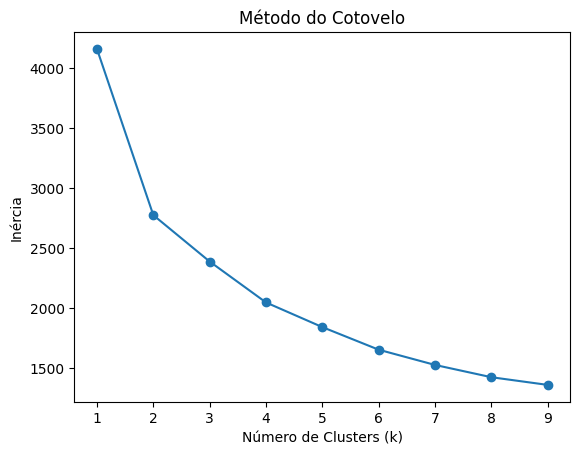

In [90]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [89]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Ponta[['G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=6, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Ponta['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Ponta[['G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR']])

     G-PK  Assist   Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR
0       4       1  3.5  2.5     5.9    47    57     36               25       23   30      24        5                44              16            34            9   136
4       0       5  3.7  4.7     8.4    37    82     93               18       47   49      30        7                55              30            24            8   116
5       1       0  1.8  1.8     3.6    15    58     28               28       14   37      11        2                24               9            13            3   102
8       1       3  1.6  2.4     3.2    39   168     48               23       37  138      28        3                23              11            30            3    36
10      0       0  0.6  0.2     0.7     7    16      8               15        5   14       1        1                22              13             7

In [91]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [92]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Ponta.groupby('Cluster').agg({col: 'mean' for col in Ponta.select_dtypes(include=['number']).columns})
print(cluster_summary)

             idade      Minutos      G-PK    Assist        Xg       xAG    xG+xAg       Prgc        PrgP       Cross  Faltas Sofridas    KeyPass         1/3     passPA   crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA        PrgR  Cluster
Cluster                                                                                                                                                                                                                                                            
0        27.692308  2114.076923  1.423077  2.115385  1.596154  1.815385  3.334615  27.615385  135.346154   23.692308        29.807692  25.230769       123.5  16.346154  3.384615         27.576923       14.384615     27.269231     2.692308   46.153846      0.0
1        26.285714  1318.489796  2.714286  2.183673  2.546939  2.177551  4.597959  38.857143   57.653061   52.918367        25.244898  23.530612   38.632653  18.020408  5.387755         50.612245       24.959184     28.7

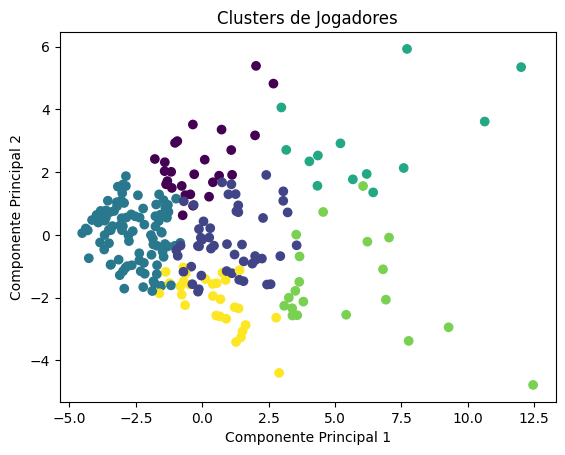

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


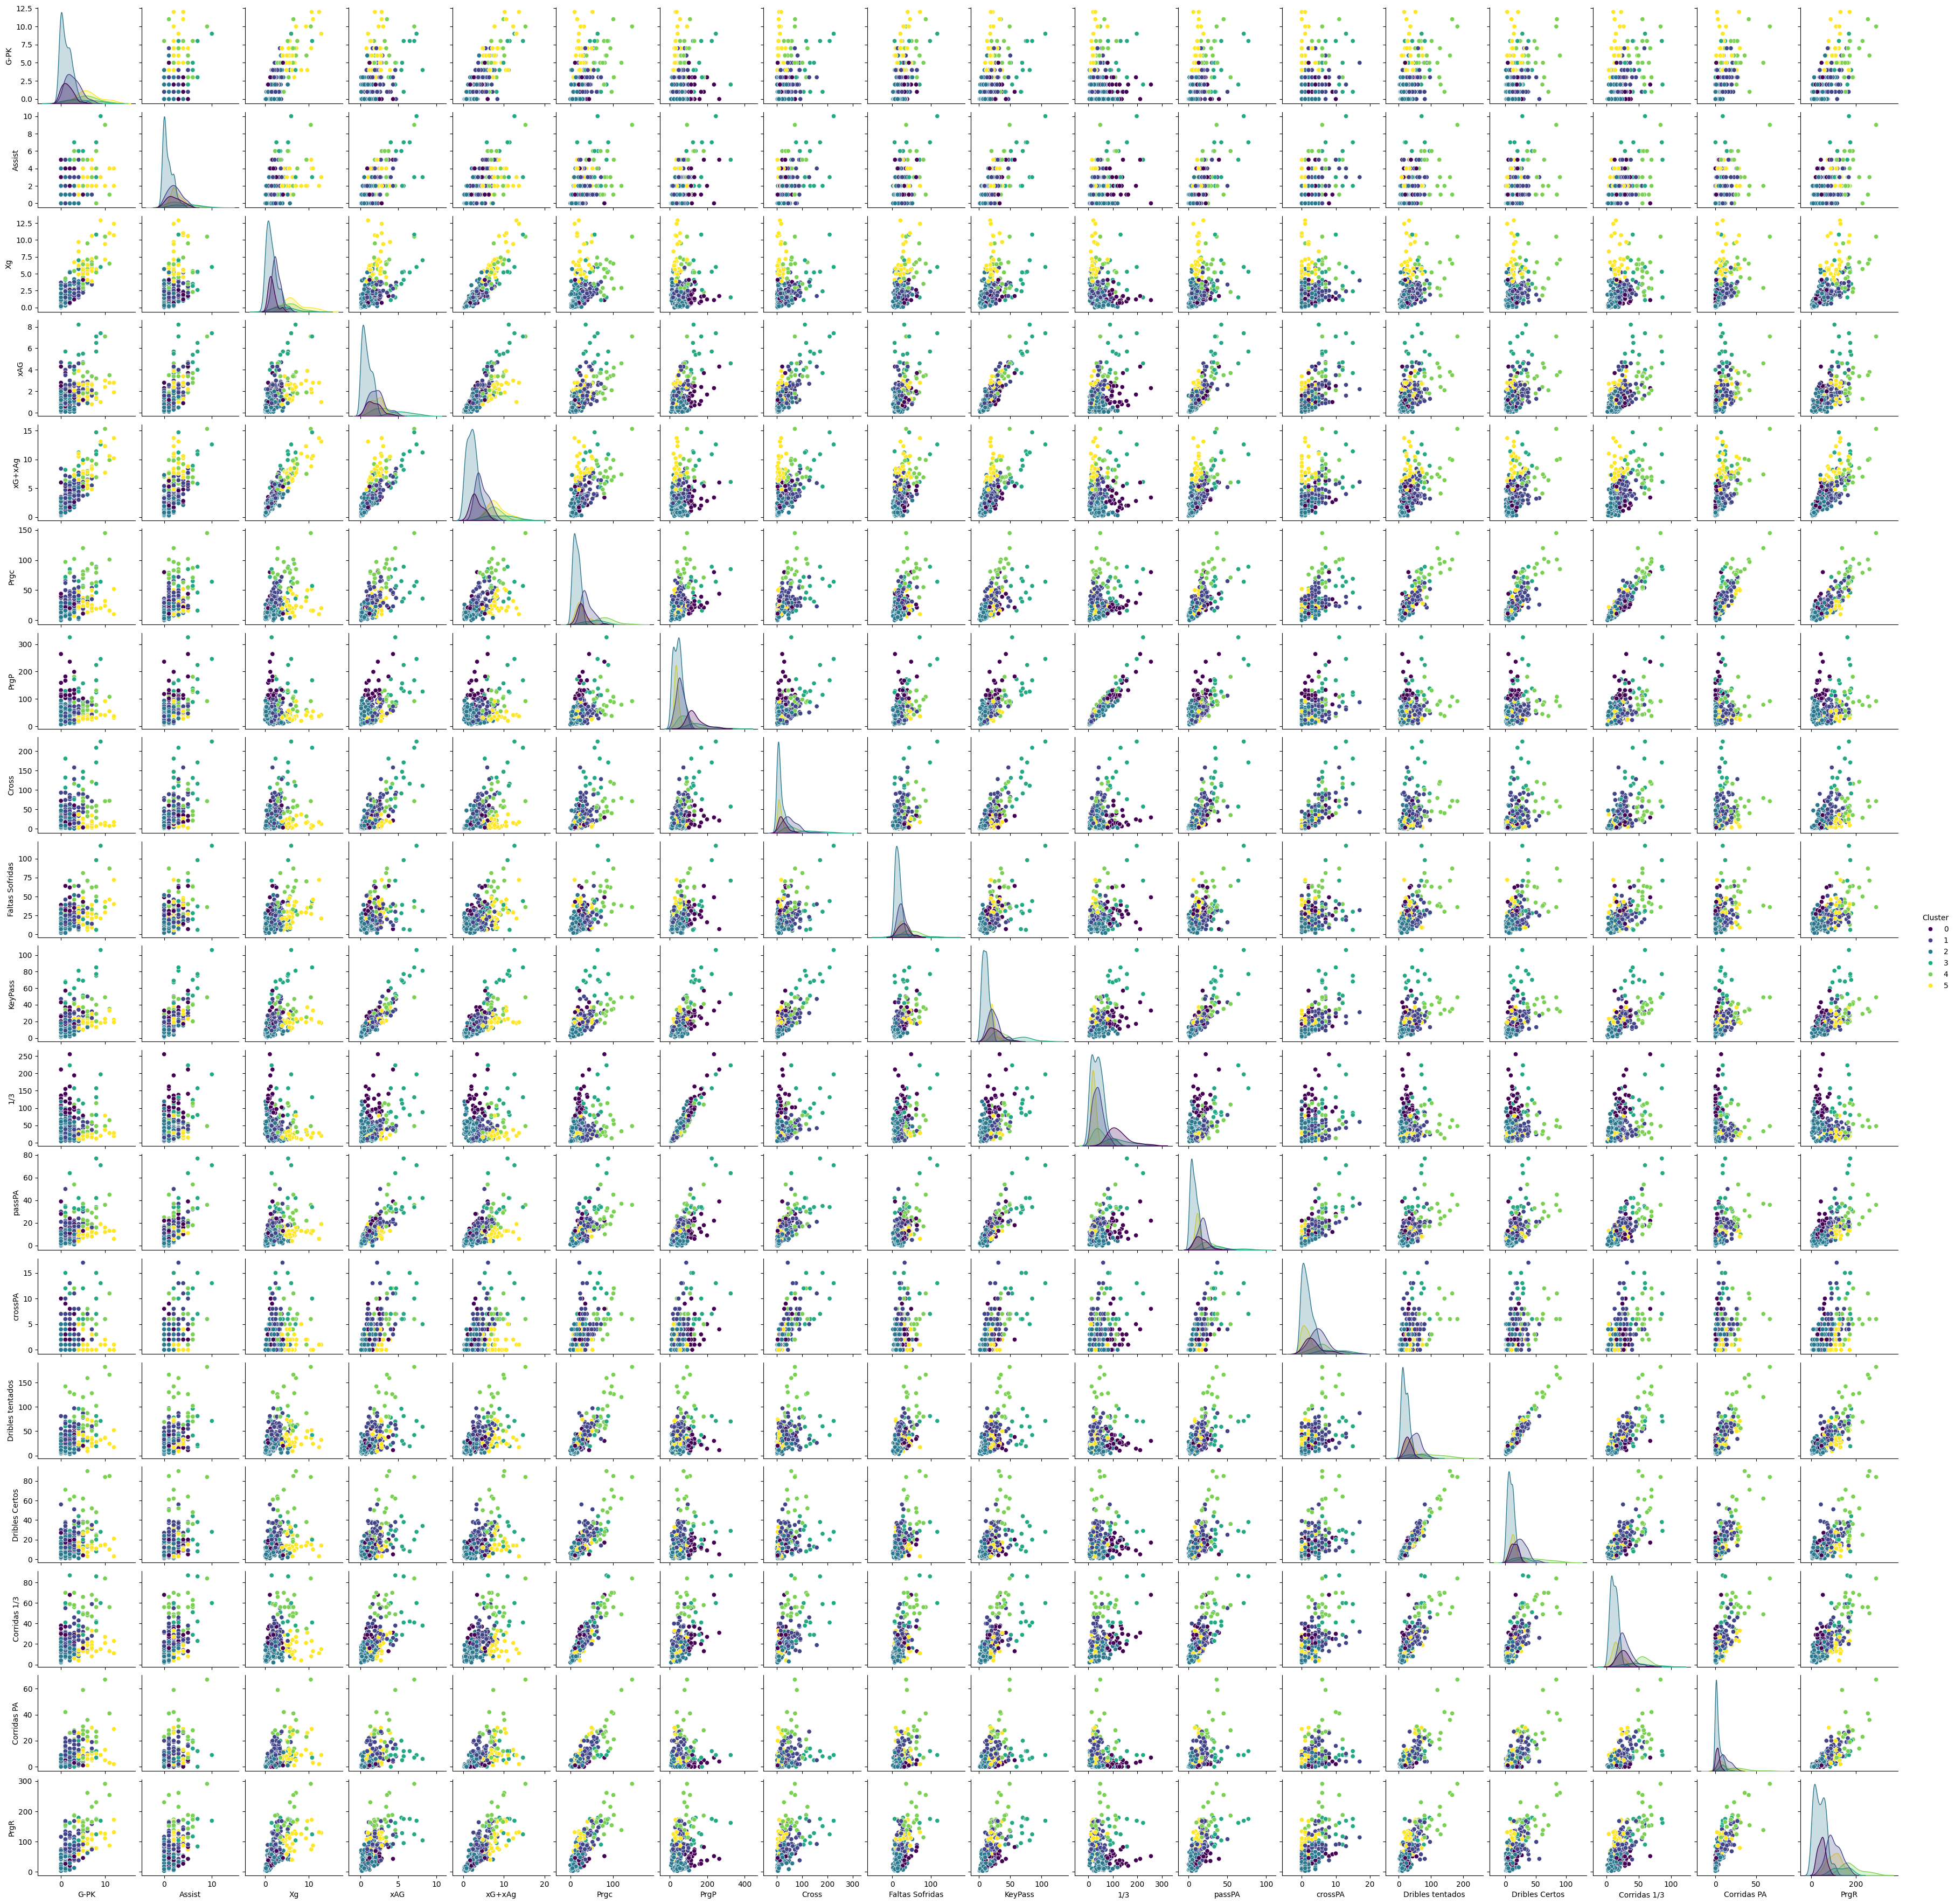

In [94]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Ponta[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **1. Minutos vs. PrgP (Passes Progressivos)**

- **Cluster 0 (Pontas Equilibrados):**
  - Alta média de minutos (2114.08) e uma das maiores médias de PrgP (135.35).
  - Esses jogadores têm uma presença constante em campo e contribuem significativamente na construção ofensiva através de passes progressivos.
  
- **Cluster 1 (Pontas Criativos):**
  - Baixa média de minutos (1318.49) em comparação a outros clusters, mas um PrgP razoável (57.65).
  - Indica que esses jogadores, mesmo com menos tempo de jogo, conseguem impactar o ataque com passes progressivos.

- **Cluster 3 (Pontas Explosivos):**
  - Alta média em minutos (2243.92) e a maior média de PrgP (163.69), destacando-se como os principais construtores de jogadas ofensivas no time.


---

### **2. xG (Gols Esperados) vs. G-PK (Gols sem Pênaltis)**

- **Cluster 4 (Pontas Finalizadores):**
  - Altos valores de xG (5.37) e G-PK (5.7).
  - Estes jogadores são os principais finalizadores, assumindo o papel de converter chances em gols.

- **Cluster 5 (Pontas Versáteis):**
  - A maior média de G-PK (6.58) e o maior xG (7.01), confirmando eficiência extrema em finalizações.
  - Este cluster representa os atacantes que lideram o placar do time.


---

### **3. Assist vs. KeyPass**

- **Cluster 3 (Pontas Explosivos):**
  - A maior média de assistências (4.76) e KeyPass (69.53), indicando que esses jogadores têm papel crucial na criação de gols.

- **Cluster 1 (Pontas Criativos):**
  - Moderada média de assistências (2.18) e KeyPass (23.53).
  - Esses jogadores contribuem menos para assistências diretas, mas criam chances importantes.

---

### **4. Dribles Certos vs. Faltas Sofridas**

- **Cluster 4 (Pontas Finalizadores):**
  - A maior média de dribles certos (48.0) e alta média de faltas sofridas (50.1).
  - Esses jogadores são habilidosos no um contra um e frequentemente sofrem faltas por serem decisivos.

- **Cluster 3 (Pontas Explosivos):**
  - Moderada média de dribles certos (24.23), mas ainda se destacam em relação a clusters defensivos.
  - Indica que eles equilibram habilidade individual e contribuição tática.


---

### **5. Cruzamentos (Cross) vs. 1/3 (Corridas no Terço Final)**

- **Cluster 0 (Pontas Equilibrados):**
  - Alta média de cruzamentos (135.35) e 1/3 (123.5), sugerindo que eles são muito ativos nas laterais, criando jogadas para finalização.

- **Cluster 4 (Pontas Finalizadores):**
  - Moderada média de cruzamentos (59.55), mas um bom número de corridas no terço final (56.5).
  - Esses jogadores são mais diretos, buscando a finalização em vez de criar.


### **Cluster 0: Pontas Equilibrados**
- **Perfil:**  
  Pontas que possuem tempo significativo em campo, participam de cruzamentos e jogadas progressivas, mas com impacto ofensivo moderado.
  
- **Médias Relevantes:**
  - **Minutos:** 2114.08 (alta participação).
  - **Assist:** 2.11 (contribuição moderada).
  - **PrgP:** 135.35 (destaque na progressão ofensiva).
  - **Cruzamentos (Cross):** 135.35 (grande volume de cruzamentos).

- **Análise Gráfica:**  
  No pairplot, os jogadores deste cluster estão concentrados em regiões médias de "Minutos" e "Cross". Eles possuem valores medianos em métricas ofensivas, mostrando que contribuem de forma consistente, mas sem destaque extremo.

---

### **Cluster 1: Pontas Criativos**
- **Perfil:**  
  Jogadores com menor tempo de jogo, mas alta eficiência em passes progressivos e assistências. Eles atuam mais como criadores de jogadas em suas participações limitadas.

- **Médias Relevantes:**
  - **Assistências:** 2.18 (bom impacto na criação).
  - **PrgP:** 57.65 (contribuição relevante no avanço ofensivo).
  - **Cross:** 52.92 (frequente participação lateral).
  - **Dribles Certos:** 24.96 (habilidade individual moderada).

- **Análise Gráfica:**  
  Os dados mostram que esses jogadores estão concentrados em métricas como assistências e passes progressivos, indicando que são criadores em menor volume de jogo.

---

### **Cluster 2: Pontas de Suporte Defensivo**
- **Perfil:**  
  Pontas que possuem baixas contribuições ofensivas e menor tempo em campo, mas participam de ações defensivas e suportam o time taticamente.

- **Médias Relevantes:**
  - **Minutos:** 1073.32 (menor tempo em campo).
  - **PrgP:** 42.47 (moderado, considerando o tempo de jogo).
  - **Dribles Certos:** 9.13 (baixa habilidade individual).

- **Análise Gráfica:**  
  No gráfico, jogadores desse cluster estão mais próximos dos valores baixos em métricas ofensivas, como assistências e dribles. Eles possuem menor impacto na criação e finalização.

---

### **Cluster 3: Pontas Explosivos**
- **Perfil:**  
  Pontas ofensivos, com alta eficiência em criação e finalização, contribuem diretamente em jogadas de gols e possuem grande habilidade individual.

- **Médias Relevantes:**
  - **Assistências:** 4.76 (alta contribuição).
  - **Cruzamentos:** 134.84 (destaque na criação).
  - **PrgP:** 163.69 (muito alta progressão ofensiva).
  - **Dribles Certos:** 24.23 (habilidade destacada).

- **Análise Gráfica:**  
  Os jogadores desse cluster dominam áreas de métricas ofensivas, destacando-se em assistências e passes progressivos. Eles são protagonistas nas jogadas ofensivas.

---

### **Cluster 4: Pontas Finalizadores**
- **Perfil:**  
  Pontas que possuem alto impacto direto na finalização e criação de gols. São jogadores-chave no ataque.

- **Médias Relevantes:**
  - **G-PK:** 5.7 (gols marcados sem pênalti).
  - **xG:** 5.37 (alto volume esperado de gols).
  - **Assistências:** 3.35 (boa criação).
  - **Dribles Certos:** 48.0 (grande habilidade individual).

- **Análise Gráfica:**  
  Os jogadores deste cluster se destacam em métricas combinadas como xG e assistências, aparecendo como os principais finalizadores no gráfico.

---

### **Cluster 5: Pontas Versáteis**
- **Perfil:**  
  Pontas que possuem boa eficiência em criação e finalização, mas com menor volume de jogo em comparação aos clusters mais ofensivos.

- **Médias Relevantes:**
  - **G-PK:** 6.58 (maior número de gols marcados).
  - **xG:** 7.01 (muito alta expectativa de gols).
  - **Assistências:** 2.51 (moderado).
  - **Dribles Certos:** 13.82 (habilidade funcional).

- **Análise Gráfica:**  
  Esses jogadores aparecem em áreas intermediárias no gráfico, mostrando que são eficientes tanto na criação quanto na finalização, mas com menor frequência.






In [99]:
cluster_names = {
    0: 'ponta equilibrado',
    1: 'ponta criativo',
    2: 'ponta sup',
    3: 'ponta elite',
    4: 'ponta fin',
    5: 'ponta versatil',
}

# Adicionar nomes ao DataFrame
Ponta['Perfil'] = Ponta['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Ponta[['jogador','time','posicao','idade', 'Minutos', 'G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR','Perfil']].head())

             jogador            time posicao  idade  Minutos  G-PK  Assist   Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR             Perfil
0   Agustín Canobbio  Ath Paranaense   FW,MF     25     1215     4       1  3.5  2.5     5.9    47    57     36               25       23   30      24        5                44              16            34            9   136     ponta criativo
4      Bruno Zapelli  Ath Paranaense   MF,FW     21     1412     0       5  3.7  4.7     8.4    37    82     93               18       47   49      30        7                55              30            24            8   116     ponta criativo
5          Christian  Ath Paranaense   MF,FW     23     1507     1       0  1.8  1.8     3.6    15    58     28               28       14   37      11        2                24               9            13            3   102          ponta sup
8        Fernand

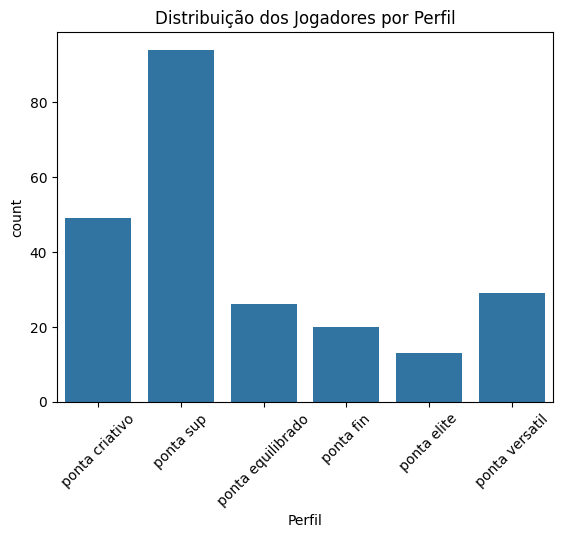

In [100]:
sns.countplot(data=Ponta, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [101]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Ponta[Ponta['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "ponta elite"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: ponta elite
                  jogador            time posicao  idade  Minutos  G-PK  Assist    Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR
32             Alejo Cruz  Atl Goianiense   FW,MF     23     2156     1       2   2.4  3.7     5.3    69   115    181               30       68   86      35       15                60              26            59            8   151
67                Shaylon  Atl Goianiense   FW,MF     26     2167     1       2   4.1  5.7     8.2    36   129    132                7       67   99      29        6                24              10            41            8    95
112  Cauly Oliveira Souza           Bahia   MF,FW     28     2676     4       6   3.5  5.4     8.9    65   138     91               28       70  123      32        6                96              44            51           20   179
117       Everton Ribeiro         

In [102]:
# Dicionário dos peso para cada métrica
pesos = {
    'xG+xAg': 10,
    'KeyPass': 5,
    'Cross' : 8,
    '1/3': 2,
    'Dribles Certos': 5,
    'Corridas 1/3': 2,
    'Corridas PA': 7,
    'passPA': 8,
    'crossPA' : 8,

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Ponta[coluna + '_Pontuacao'] = Ponta[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Ponta['Pontuacao_Total'] = Ponta[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Ponta['Pontuacao_Total'].min()
max_pontuacao = Ponta['Pontuacao_Total'].max()
Ponta['Pontuacao'] = (
    (Ponta['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'ponta versatil'
jogadores_filtrados = Ponta[Ponta['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: ponta versatil
 Ranking                time posicao            jogador         Perfil  Pontuacao
       1              Cuiabá      FW       Isidro Pitta ponta versatil  21.901709
       2       Botafogo (RJ)      FW      Júnior Santos ponta versatil   19.65812
       3           Palmeiras      FW               Rony ponta versatil  19.230769
       4           Fortaleza   FW,MF             Moises ponta versatil  18.456197
       5         Corinthians      FW       Yuri Alberto ponta versatil  18.135684
       6               Bahia      FW      Everaldo Stum ponta versatil  18.135684
       7           Juventude      FW              Erick ponta versatil  16.880342
       8           Palmeiras      FW         José López ponta versatil  16.720085
       9               Bahia   FW,MF               Biel ponta versatil  16.559829
      10           São Paulo   MF,FW            Luciano ponta versatil   16.53312
      11           São Paulo      FW   Jonathan Ca

In [109]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'ponta elite'  # Defina o perfil desejado
jogadores_filtrados = Ponta[Ponta['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'ponta elite': ['Alejo Cruz', 'Shaylon', 'Cauly Oliveira Souza', 'Everton Ribeiro', 'Jefferson Savarino', 'Igor Coronado', 'Rodrigo Garro', 'Matheus Pereira', 'Ganso', 'Tomas Pochettino', 'Franco Cristaldo', 'Alan Patrick', 'Raphael Veiga']
Digite o nome do jogador (ou 'sair' para finalizar): Jefferson Savarino
Insira o valor de mercado para Jefferson Savarino (€M): 9
Digite o nome do jogador (ou 'sair' para finalizar): Igor Coronado
Insira o valor de mercado para Igor Coronado (€M): 3
Digite o nome do jogador (ou 'sair' para finalizar): Alejo Cruz
Insira o valor de mercado para Alejo Cruz (€M): 0.7
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking              jogador  Valor de Mercado (€M)  Pontuacao  Custo por Ponto (€M)  Score de Valor
       1           Alejo Cruz                    0.7  69.871795              0.010018        99.81685
       2        Igor Coronado                    3.0


Jogadores selecionados: Ademir Santos, Lucas Barbosa, Estêvão Willian
             jogador       time posicao  idade  Minutos  G-PK  Assist    Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR
107    Ademir Santos      Bahia   FW,MF     28     1131     3       4   3.6  2.8     6.4    66    29     54               27       20   19      15        8                63              27            26           26   147
536    Lucas Barbosa  Juventude      FW     22     2443     7       2   6.4  3.4     9.8    61   103     55               33       28   59      29        6                51              18            47           12   165
558  Estêvão Willian  Palmeiras      FW     17     2097    10       9  10.5  7.1    15.3   145    92     71               36       49   48      36        6               182              84            84           67   291


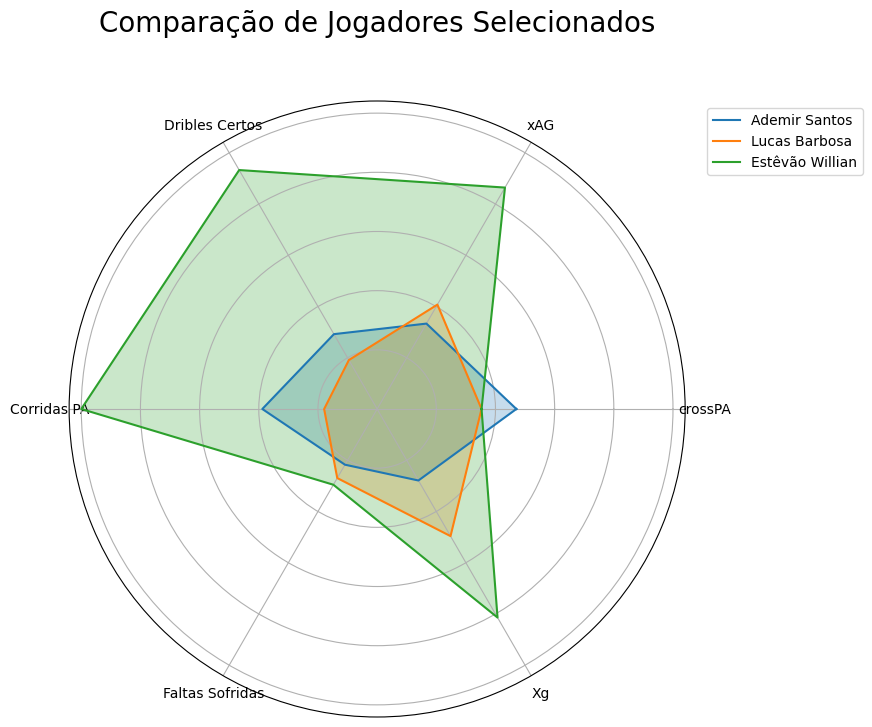

In [107]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['crossPA','xAG','Dribles Certos','Corridas PA','Faltas Sofridas','Xg']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Estêvão Willian','Lucas Barbosa','Ademir Santos']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Ponta)